In [1]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [4]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

<ipython-input-4-55cc01c98bba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_imputed'] = X_train['Age']
<ipython-input-4-55cc01c98bba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Age_imputed'] = X_test['Age']


In [9]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]=X_train['Age'].dropna().sample(X_train['Age_imputed'].isnull().sum()).values

In [10]:
X_train['Age_imputed'].isnull().sum()

0

In [12]:
X_test['Age_imputed'][X_test['Age_imputed'].isnull()]=X_train['Age'].dropna().sample(X_test['Age_imputed'].isnull().sum()).values

In [14]:
X_test['Age_imputed'].isnull().sum()

0

<AxesSubplot:ylabel='Density'>

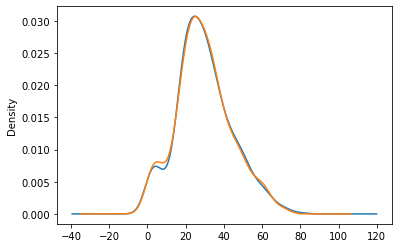

In [15]:
# plotting the graphs
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde')
X_train['Age_imputed'].plot(kind='kde')

In [16]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,50.0
493,71.0,49.5042,71.0
527,NaN,221.7792,47.0


In [18]:
X_train['Age'].var()

204.3495133904614

In [19]:
X_train['Age_imputed'].var()

207.12409846690812

In [20]:
X_train[['Fare', 'Age', 'Age_imputed']].cov() #The covariance will be affected while variance and shape of data does not affect


,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,75.216789
Age,71.512440,204.349513,204.349513
Age_imputed,75.216789,204.349513,207.124098


<AxesSubplot:>

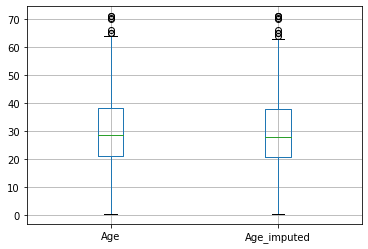

In [21]:
X_train[['Age', 'Age_imputed']].boxplot()

In [23]:
#sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))
# While making production based u need to keep the parameter random_state

In [25]:
data = pd.read_csv('train_house.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [26]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [27]:
X = data
y = data['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

<ipython-input-27-dceb34a293ae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'] = X_train['GarageQual']
<ipython-input-27-dceb34a293ae>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'] = X_test['GarageQual']
<ipython-input-27-dceb34a293ae>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.